## Unsupervised Learning: K-Means Clustering (Iris dataset)

---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* Chulalongkorn Business School, Thailand
---

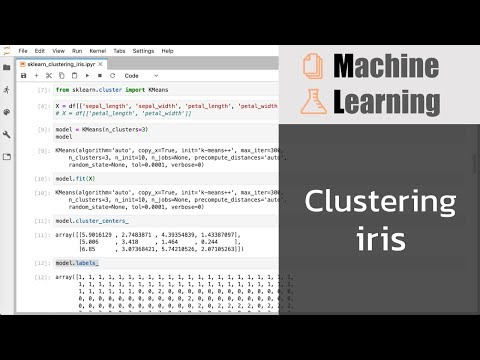

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('vxbaeX1KBww', width=720, height=405)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.3.4
numpy   version = 1.20.3
seaborn version = 0.11.2


In [3]:
pd.Timestamp.now()

Timestamp('2022-09-29 12:39:41.905345')

In [4]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
69,5.6,2.5,3.9,1.1,versicolor
104,6.5,3.0,5.8,2.2,virginica
26,5.0,3.4,1.6,0.4,setosa
115,6.4,3.2,5.3,2.3,virginica
143,6.8,3.2,5.9,2.3,virginica


In [5]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

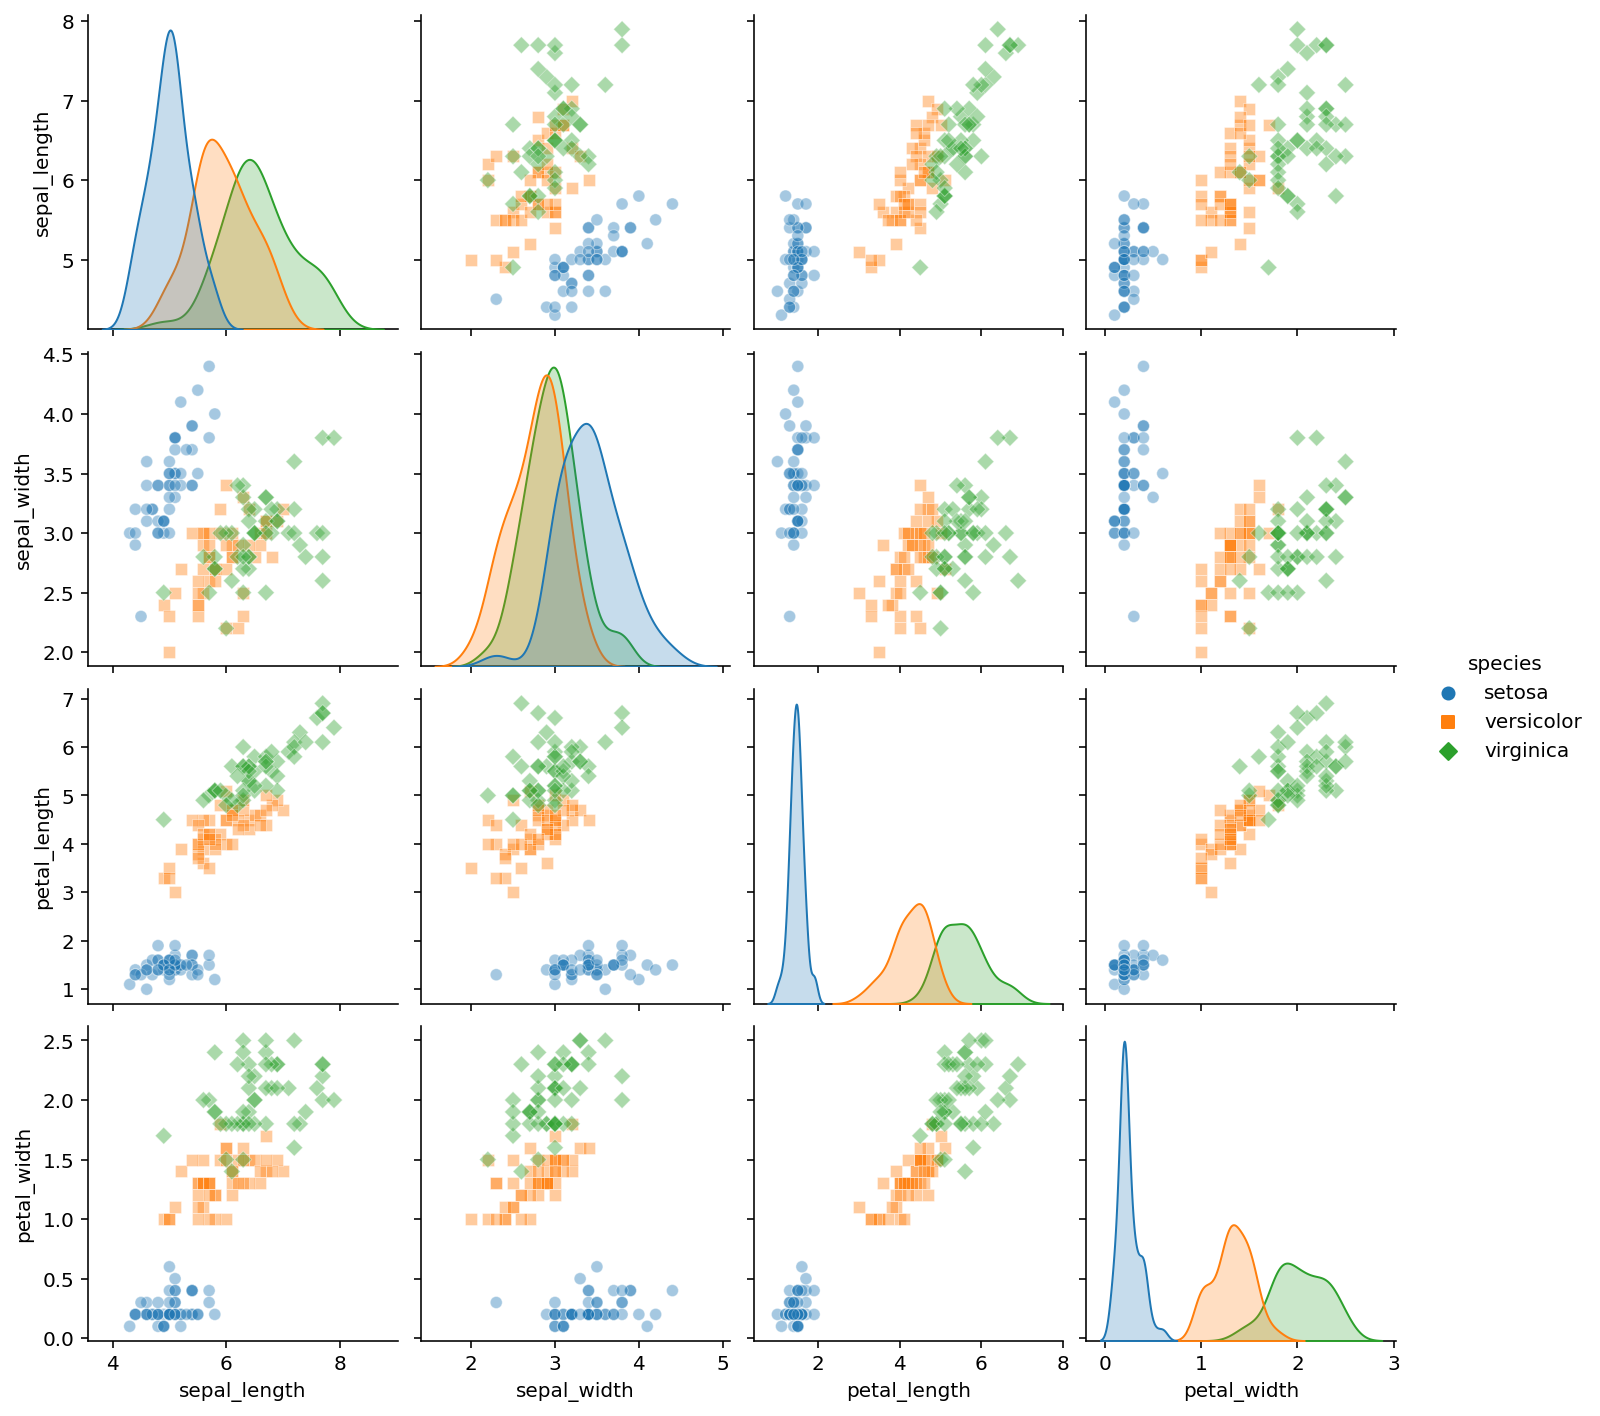

In [8]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
             hue='species', markers=['o', 's', 'D'],plot_kws={'alpha': .4});

---

# Scikit-learn: KMeans Clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# X = df[['petal_length', 'petal_width']]

## use 'yellowbrick' package to visualize Silhouette Analysis
* install yellowebrick: **pip install -U yellowbrick**
* yellowbrick doc: https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
* how to interpret Silhouette coefficient: https://stats.stackexchange.com/questions/10540/how-to-interpret-mean-of-silhouette-plot
* youtube: https://www.youtube.com/watch?v=5TPldC_dC0s

In [24]:
#!pip install -U yellowbrick

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

In [26]:
cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [27]:
def silhouette_plot(X, from_k, to_k):
    for k in range(from_k, to_k + 1):
        # Instantiate the clustering model and visualizer
        m = KMeans(n_clusters=k)
        visualizer = SilhouetteVisualizer(m)
        visualizer.fit(X) # Fit the training data to the visualizer
        visualizer.poof() # Draw/show/poof the data

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


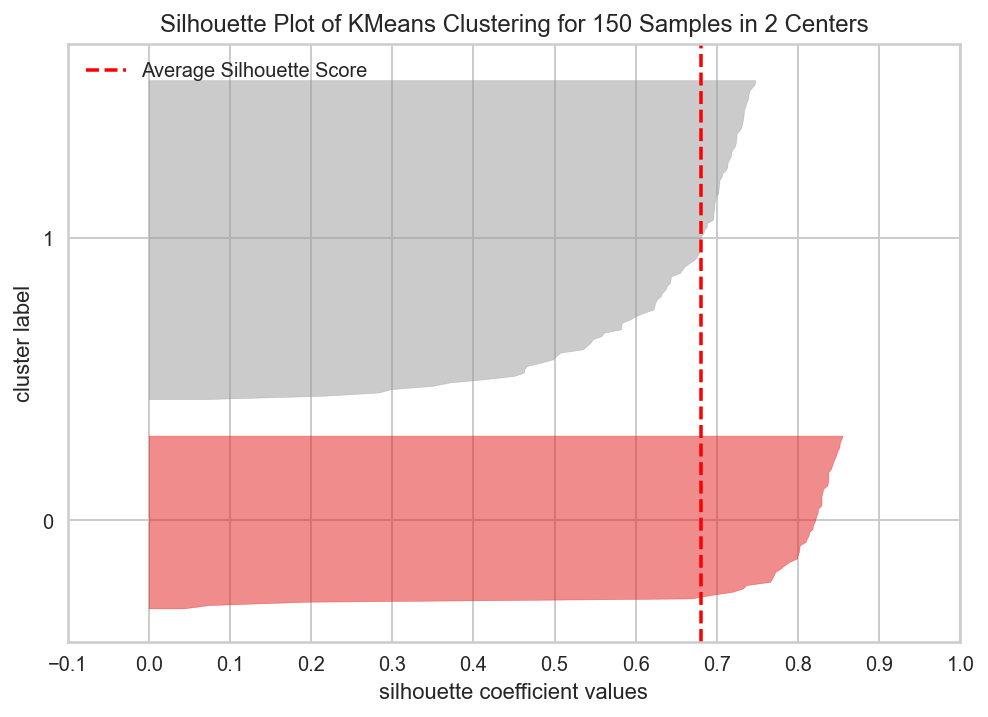

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


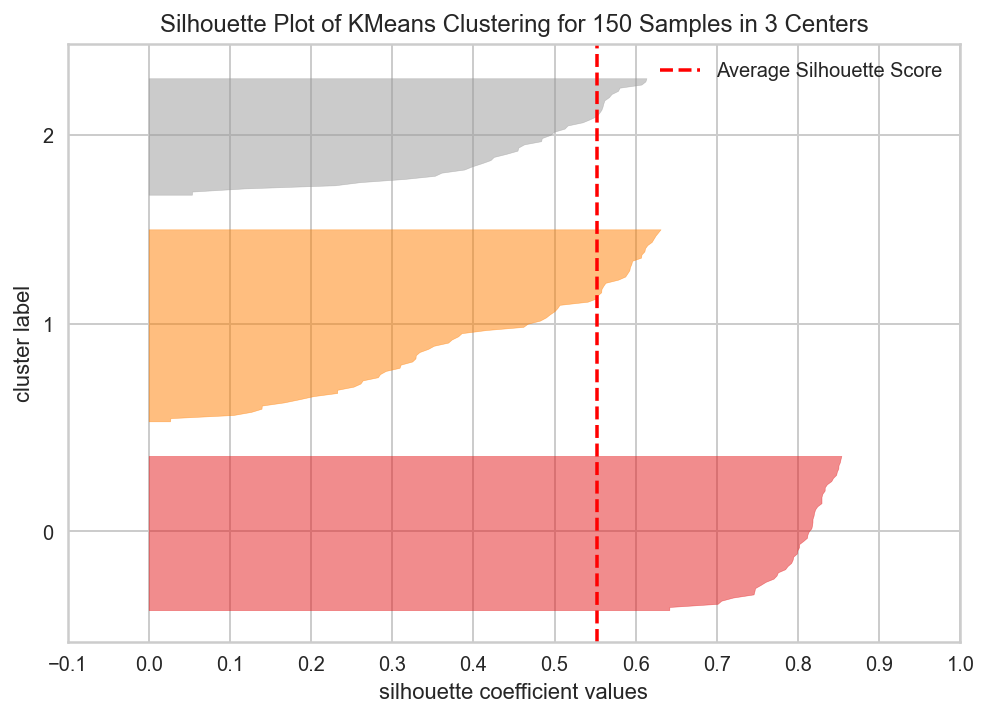

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


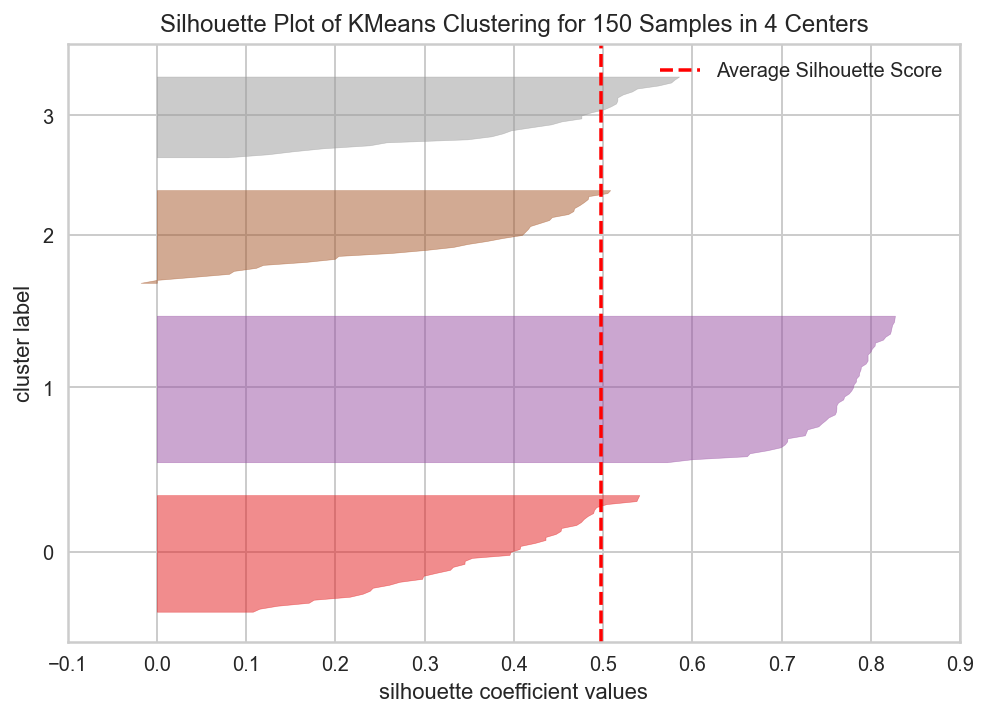

In [28]:
silhouette_plot(X, 2, 4)

In [29]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [30]:
model.fit(X)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [31]:
model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [32]:
model.transform(X) # the distance between each point and centroid

array([[0.14694217, 3.41925061, 5.0595416 ],
       [0.43816892, 3.39857426, 5.11494335],
       [0.41230086, 3.56935666, 5.27935534],
       [0.51883716, 3.42240962, 5.15358977],
       [0.19796969, 3.46726403, 5.10433388],
       [0.68380699, 3.14673162, 4.68148797],
       [0.41520116, 3.51650264, 5.21147652],
       [0.0599333 , 3.33654987, 5.00252706],
       [0.80099438, 3.57233779, 5.32798107],
       [0.36659514, 3.3583767 , 5.06790865],
       [0.48784424, 3.32449131, 4.89806763],
       [0.25138019, 3.31126872, 4.9966845 ],
       [0.49192682, 3.46661272, 5.19103612],
       [0.90906105, 3.90578362, 5.65173594],
       [1.02019214, 3.646649  , 5.10804455],
       [1.21309192, 3.49427881, 4.88564095],
       [0.66241377, 3.495248  , 5.03090587],
       [0.1509702 , 3.38444981, 5.02342022],
       [0.82848778, 3.11245944, 4.61792995],
       [0.39898872, 3.37738931, 4.97213426],
       [0.46172719, 3.07471224, 4.6955761 ],
       [0.33762701, 3.31506588, 4.9236821 ],
       [0.

In [33]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [34]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [35]:
df['species'].values # Series to ndarray

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [36]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [37]:
pd.crosstab(df['species'], model.labels_)

col_0,0,1,2
species,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36


In [38]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
119,6.0,2.2,5.0,1.5,virginica
63,6.1,2.9,4.7,1.4,versicolor
46,5.1,3.8,1.6,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa
100,6.3,3.3,6.0,2.5,virginica


In [39]:
model.predict([
    [6, 2, 4.3, 1.7],
    [7, 3.2, 6, 2],
    [5, 3, 1, .25]
              ])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 2, 0])

---

## Optimal number of clusters

In [40]:
ssd=[]
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
ssd

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

[[2, 152.36870647733906],
 [3, 78.94084142614602],
 [4, 57.31787321428571],
 [5, 46.56163015873016],
 [6, 39.185257692307694],
 [7, 34.299985543844244],
 [8, 30.32133831064266],
 [9, 28.10229154179154]]

In [41]:
xy=np.array(ssd)
print(xy)

[[  2.         152.36870648]
 [  3.          78.94084143]
 [  4.          57.31787321]
 [  5.          46.56163016]
 [  6.          39.18525769]
 [  7.          34.29998554]
 [  8.          30.32133831]
 [  9.          28.10229154]]


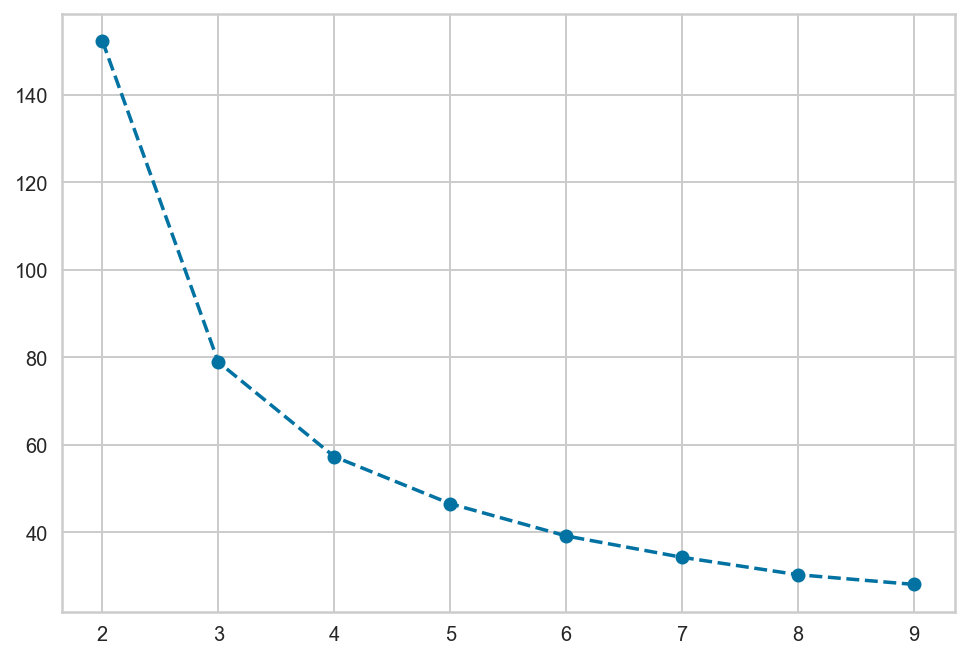

In [42]:
plt.plot(xy[:, 0], xy[:, 1], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [43]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd

,k,ssd
0,2,152.368706
1,3,78.940841
2,4,57.317873
3,5,46.561630
4,6,39.185258
5,7,34.299986
6,8,30.321338
7,9,28.102292


In [44]:
dd['pct_chg']=dd['ssd'].pct_change() * 100
dd

,k,ssd,pct_chg
0,2,152.368706,NaN
1,3,78.940841,-48.190909
2,4,57.317873,-27.391358
3,5,46.561630,-18.765949
4,6,39.185258,-15.842170
5,7,34.299986,-12.467118
6,8,30.321338,-11.599560
7,9,28.102292,-7.318433


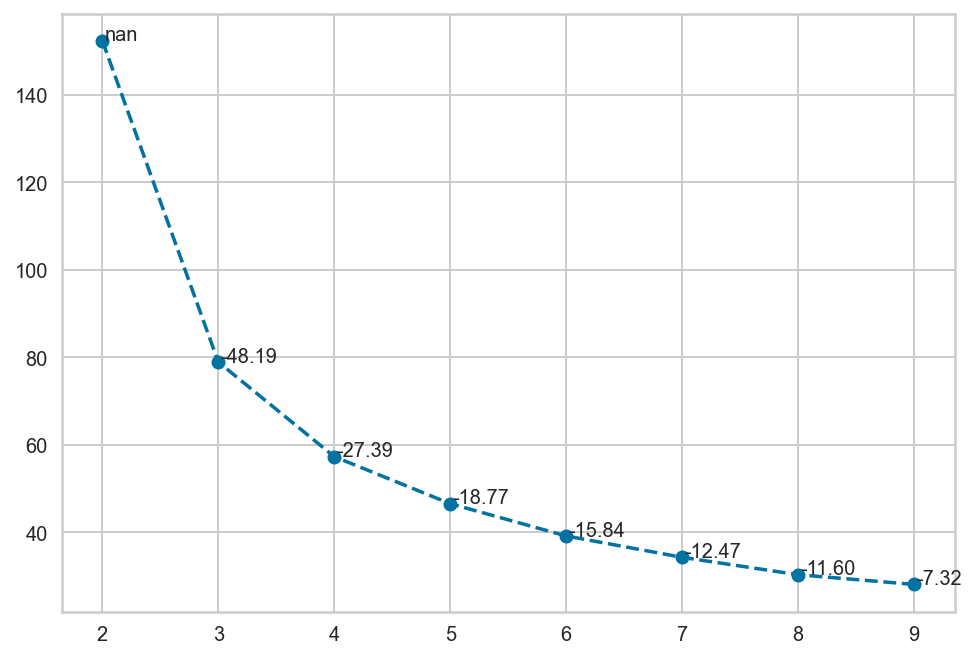

In [45]:
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')
for index, row in dd.iterrows():
    plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

## sense making about each cluster

In [46]:
df['cluster']=model.labels_
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [47]:
df.groupby('cluster').describe().T

cluster                     0          1          2
sepal_length count  50.000000  62.000000  38.000000
             mean    5.006000   5.901613   6.850000
             std     0.352490   0.466410   0.494155
             min     4.300000   4.900000   6.100000
             25%     4.800000   5.600000   6.425000
             50%     5.000000   5.900000   6.700000
             75%     5.200000   6.200000   7.200000
             max     5.800000   7.000000   7.900000
sepal_width  count  50.000000  62.000000  38.000000
             mean    3.418000   2.748387   3.073684
             std     0.381024   0.296284   0.290092
             min     2.300000   2.000000   2.500000
             25%     3.125000   2.500000   2.925000
             50%     3.400000   2.800000   3.000000
             75%     3.675000   3.000000   3.200000
             max     4.400000   3.400000   3.800000
petal_length count  50.000000  62.000000  38.000000
             mean    1.464000   4.393548   5.742105
             std     0.173511   0.508895   0.488590
             min     1.000000   3.000000   4.900000
             25%     1.400000   4.025000   5.425000
             50%     1.500000   4.500000   5.650000
             75%     1.575000   4.800000   6.000000
             max     1.900000   5.100000   6.900000
petal_width  count  50.000000  62.000000  38.000000
             mean    0.244000   1.433871   2.071053
             std     0.107210   0.297500   0.279872
             min     0.100000   1.000000   1.400000
             25%     0.200000   1.300000   1.825000
             50%     0.200000   1.400000   2.100000
             75%     0.300000   1.575000   2.300000
             max     0.600000   2.400000   2.500000

<AxesSubplot:xlabel='cluster', ylabel='count'>

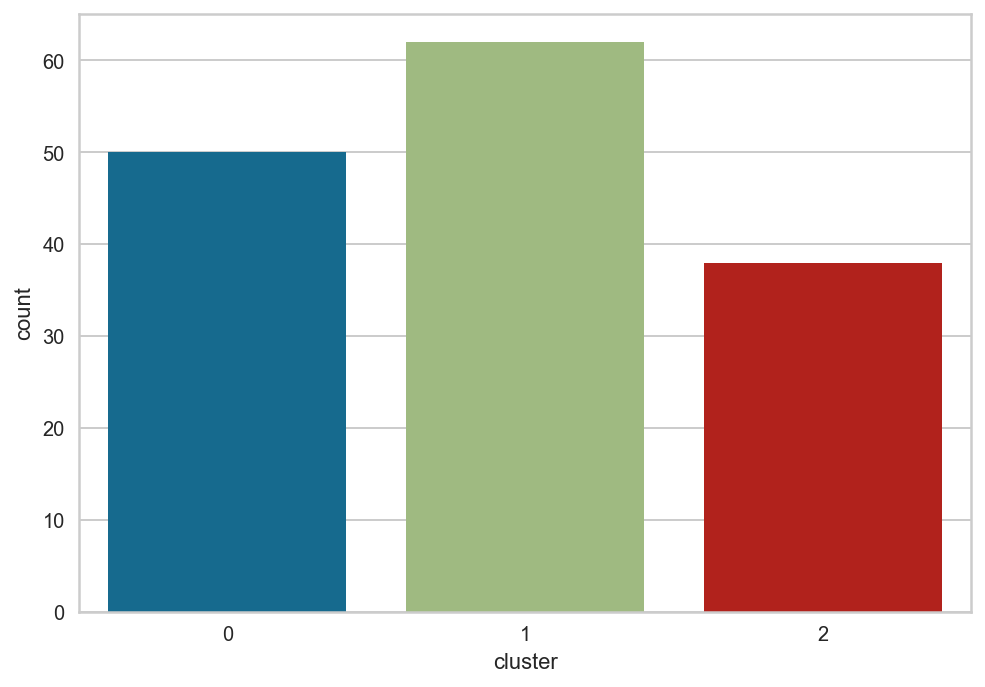

In [48]:
sns.countplot(x='cluster', data=df)

In [49]:
df.groupby('cluster').head(3).sort_values('cluster')

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
50,7.0,3.2,4.7,1.4,versicolor,1
51,6.4,3.2,4.5,1.5,versicolor,1
53,5.5,2.3,4.0,1.3,versicolor,1
52,6.9,3.1,4.9,1.5,versicolor,2
77,6.7,3.0,5.0,1.7,versicolor,2
100,6.3,3.3,6.0,2.5,virginica,2


In [50]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'cluster'],
      dtype='object')

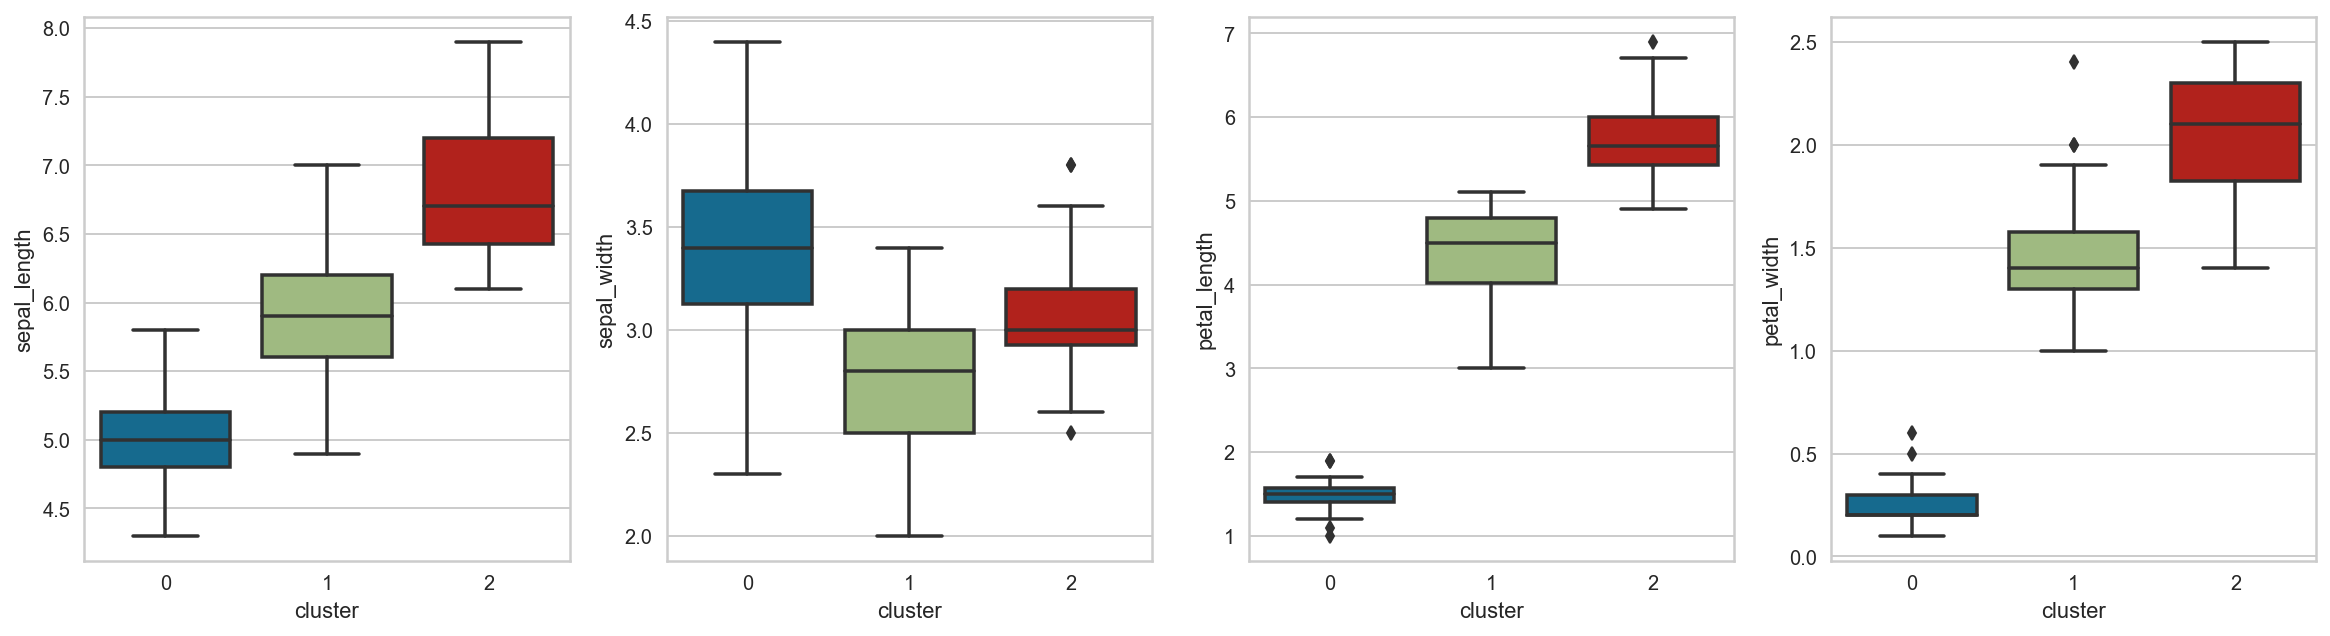

In [51]:
cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, ax = plt.subplots(ncols=len(cols), figsize=(20, 5))
for i, col in enumerate(cols):
    sns.boxplot(x='cluster', y=col, data=df, ax=ax[i])

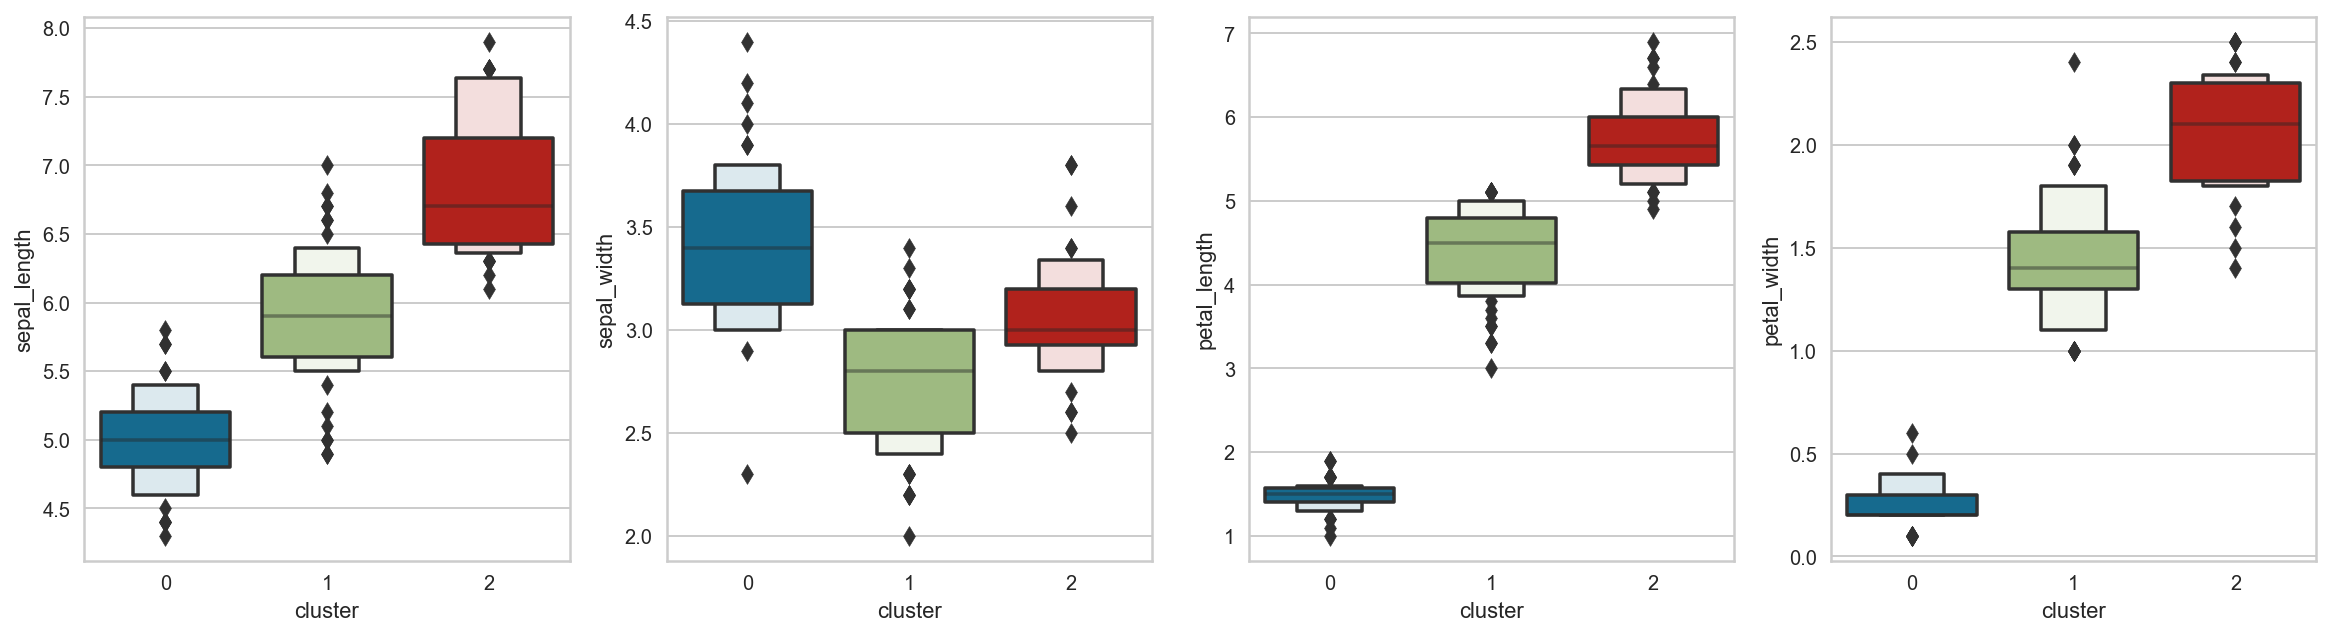

In [52]:
cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, ax = plt.subplots(ncols=len(cols), figsize=(20, 5))
for i, col in enumerate(cols):
    sns.boxenplot(x='cluster', y=col, data=df, ax=ax[i])

In [53]:
df.groupby('cluster').median()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,5.0,3.4,1.50,0.2
1,5.9,2.8,4.50,1.4
2,6.7,3.0,5.65,2.1


<AxesSubplot:ylabel='cluster'>

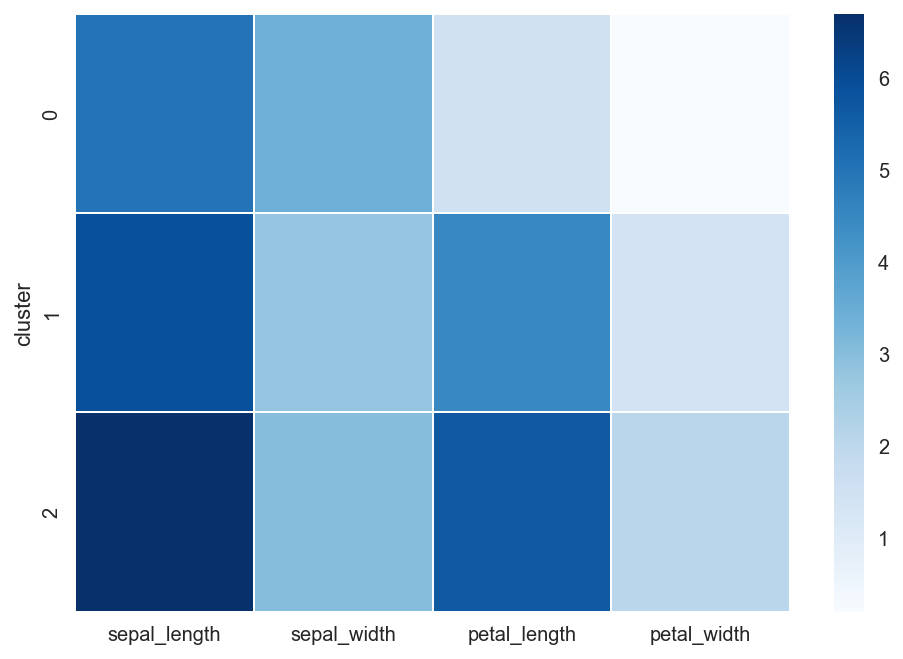

In [54]:
sns.heatmap(df.groupby('cluster').median(), cmap="Blues", linewidths=1)

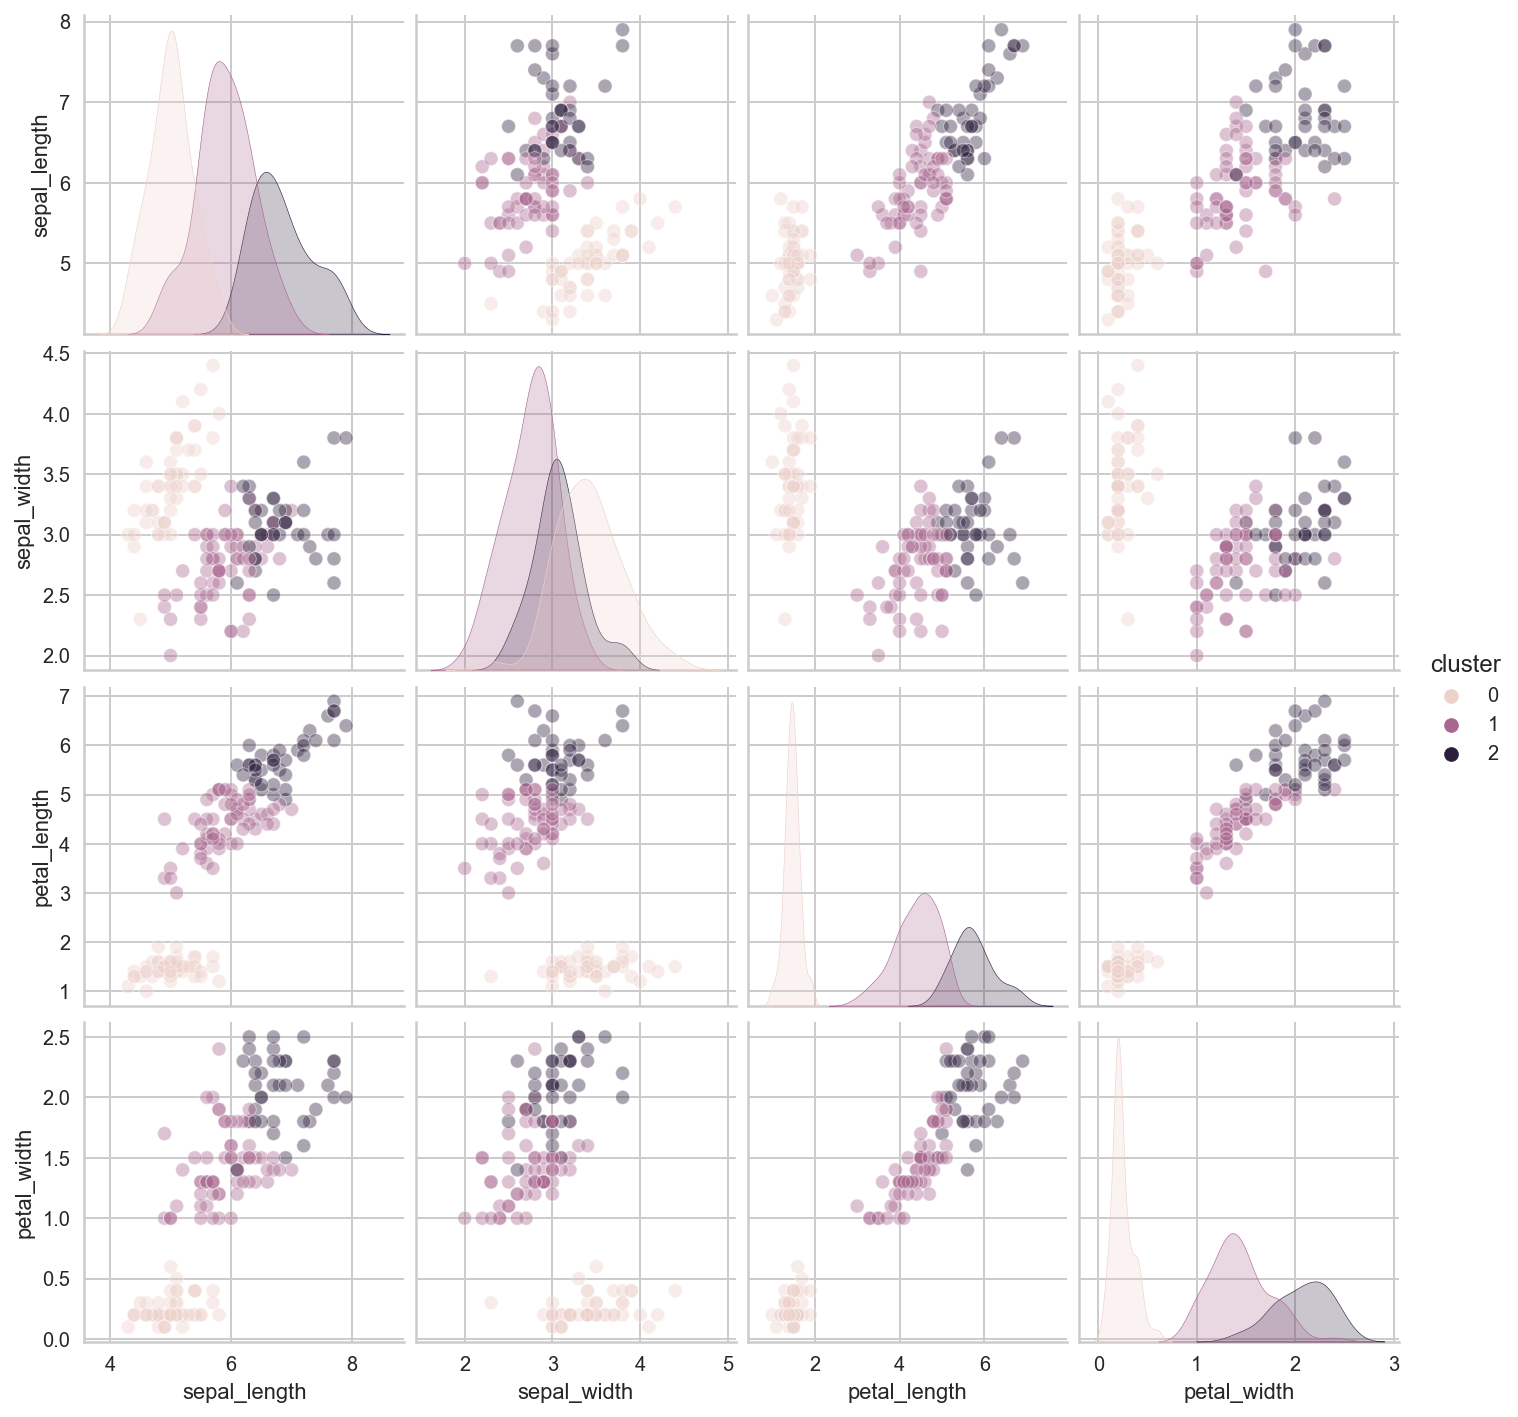

In [55]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
             hue='cluster',
             plot_kws={'alpha': .4});